# DeepFace

## Installation

### 1. Install the model
Install the model from it's url:
#### Verification:
* [VGG Weights](https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5 "VGG Weights download link from github")
* [Facenet512 Weights](https://github.com/serengil/deepface_models/releases/download/v1.0/facenet512_weights.h5 "Facenet512 Weights download link from github")
* [DlibResNet Weights](http://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2 "DlibResNet Weights download link from github") <b>(Best on our project)</b>

### Detectors:

Emotion Detection: [Facial Expression Weights](https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5 "Facial Expression Weights download link from github")

Face Detector: [Age Model Weights](https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5 "Age Model Weights download link from github")

Face Detector: [Dlib Face Landmarks](http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2 "Dlib Shape Predictor  for face landmarks from dlib website") (You need to extract the `.dat` file from the `.bz2` file)

### 2. Put the all the files in it's folder

`<user folder path>\.deepface\weights`

In [24]:
from deepface import DeepFace
import matplotlib.pyplot as plt
import json


In [11]:
#avaliable models with their sizes
#"VGG-Face 580mb", "Facenet 92mb", "Facenet512 95mb", "OpenFace 15mb", "DeepFace 95mb", "DeepID 1.6mb", "ArcFace 137mb"
#connect to proxy to be able to download the model

models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib"]
metrics = ["cosine", "euclidean", "euclidean_l2"]
backends = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface']

# Face Recognition

In [30]:
result = DeepFace.verify("../../images/m1.jpg", "../../images/m3.jpg",detector_backend=backends[2], distance_metric = metrics[2],model_name = models[0])
print(json.dumps(result, indent=2, sort_keys=True))

{
  "distance": 0.48961451098582215,
  "max_threshold_to_verify": 0.86,
  "model": "VGG-Face",
  "similarity_metric": "euclidean_l2",
  "verified": true
}


# Face analysis for Age, Gender, Race and Emotion

In [29]:
obj = DeepFace.analyze(img_path = "../../images/001.jpg", actions = ['emotion',"age","gender"],detector_backend=backends[2],prog_bar=False)
print(json.dumps(obj, indent=2, sort_keys=True))

{
  "age": 28,
  "dominant_emotion": "sad",
  "emotion": {
    "angry": 0.09946597867256275,
    "disgust": 1.1733537064117476e-07,
    "fear": 0.30233056223872673,
    "happy": 5.234846757233508e-08,
    "neutral": 2.8185549940797685,
    "sad": 96.779650257805,
    "surprise": 1.0036962311394183e-09
  },
  "gender": "Man",
  "region": {
    "h": 107,
    "w": 107,
    "x": 259,
    "y": 92
  }
}


# Detect one face

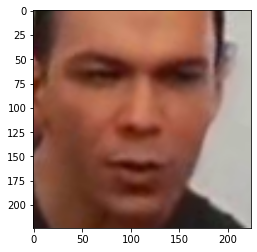

True

In [28]:
import cv2
import numpy as np

face = DeepFace.detectFace(img_path = "../../images/022.jpg",  detector_backend = backends[2])
face = face * 255
face = np.array(face,np.uint8)
plt.imshow(face)
plt.show()
RGB = cv2.cvtColor(face, cv2.COLOR_RGB2BGR)
cv2.imwrite("./result/face.jpg",RGB)
